In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
slaves_df = []

dir_path = r'gcp-results/'
for filename in np.sort(os.listdir(dir_path)):
    if filename.endswith(".csv"):
        print(dir_path + filename)
        df = pd.read_csv(dir_path + filename)
        slaves_df.append(df)

gcp-results/2019-02-05-metricbeat-1slaves.csv
gcp-results/2019-02-05-metricbeat-2slave.csv
gcp-results/2019-02-05-metricbeat-2slaves.csv
gcp-results/2019-02-05-metricbeat-3slaves.csv
gcp-results/2019-02-05-metricbeat-4slaves.csv
gcp-results/2019-02-05-metricbeat-5slaves.csv
gcp-results/2019-02-05-metricbeat-6slaves.csv
gcp-results/2019-02-05-metricbeat-7slaves.csv


In [75]:
slaves_df[0]['Metric'].unique()

,Metric
0,Cumulative indexing time of primary shards
1,Min cumulative indexing time across primary sh...
2,Median cumulative indexing time across primary...
3,Max cumulative indexing time across primary sh...
4,Cumulative indexing throttle time of primary s...
...,...
69,50th percentile service time
70,90th percentile service time
71,99th percentile service time
72,100th percentile service time


In [76]:
total_data = pd.DataFrame(slaves_df[0]['Metric'])
total_data['Unit'] = slaves_df[0]['Unit']
cell_names = []

for i, slave in enumerate(slaves_df):
    cell_name = str(i) + "_slave"
    cell_names.append(cell_name)
    total_data[cell_name] = slaves_df[i]['Value']

total_data

,Metric,Unit,0_slave,1_slave,2_slave,3_slave,4_slave,5_slave,6_slave,7_slave
0,Cumulative indexing time of primary shards,min,3.021633,2.945250,3.044817,0.00,0.00,0.00,0.00,0.00
1,Min cumulative indexing time across primary sh...,min,3.021633,2.945250,3.044817,0.00,0.00,0.00,0.00,0.00
2,Median cumulative indexing time across primary...,min,3.021633,2.945250,3.044817,0.00,0.00,0.00,0.00,603.84
3,Max cumulative indexing time across primary sh...,min,3.021633,2.945250,3.044817,2060.43,3113.08,4742.96,1350.93,3088.14
4,Cumulative indexing throttle time of primary s...,min,0.000000,0.000000,0.000000,2715.72,4775.75,5483.24,1826.94,3950.15
...,...,...,...,...,...,...,...,...,...,...
69,50th percentile service time,ms,5.734712,4.804763,5.971241,NaN,NaN,NaN,NaN,NaN
70,90th percentile service time,ms,6.086274,5.306196,6.984724,NaN,NaN,NaN,NaN,NaN
71,99th percentile service time,ms,6.829202,5.662069,8.606552,NaN,NaN,NaN,NaN,NaN
72,100th percentile service time,ms,8.544934,5.896414,63.792430,NaN,NaN,NaN,NaN,NaN


In [80]:
list_unit = total_data['Unit']
list_row = list(total_data['Metric'].unique())
list_row = list_row[:-1]
list_row

['Cumulative indexing time of primary shards',
 'Min cumulative indexing time across primary shards',
 'Median cumulative indexing time across primary shards',
 'Max cumulative indexing time across primary shards',
 'Cumulative indexing throttle time of primary shards',
 'Min cumulative indexing throttle time across primary shards',
 'Median cumulative indexing throttle time across primary shards',
 'Max cumulative indexing throttle time across primary shards',
 'Cumulative merge time of primary shards',
 'Cumulative merge count of primary shards',
 'Min cumulative merge time across primary shards',
 'Median cumulative merge time across primary shards',
 'Max cumulative merge time across primary shards',
 'Cumulative merge throttle time of primary shards',
 'Min cumulative merge throttle time across primary shards',
 'Median cumulative merge throttle time across primary shards',
 'Max cumulative merge throttle time across primary shards',
 'Cumulative refresh time of primary shards',
 

In [81]:
name_to_index = {}
for i in range(len(list_row)):
    name_to_index[total_data['Metric'][i]] = i
    
def get_plot_data(index):
    return [float(total_data.iloc[index][str(i+1) + '_slave']) for i in range(7)]

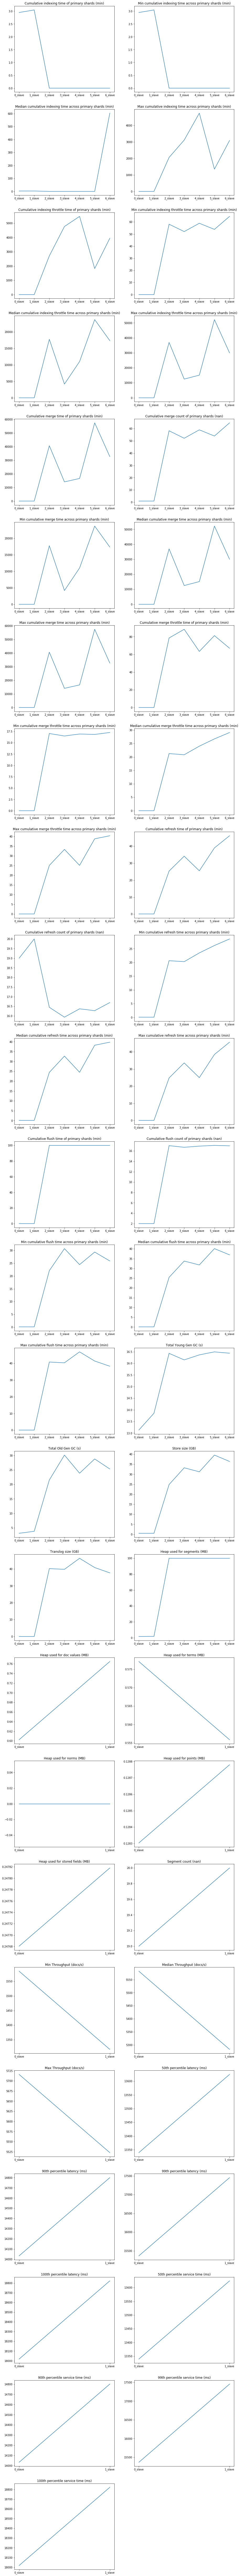

In [82]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=[15,len(list_row)//2*7.5])
for i,row in enumerate(list_row):
    plt.subplot(len(list_row)//2+1,2,i+1)
    plt.xticks([0,1,2,3,4,5,6], cell_names)
    plt.title(row + ' ('+ str(list_unit[name_to_index[row]])+')')
#     print(get_plot_data(name_to_index[row]))
    plt.plot(get_plot_data(name_to_index[row]))